<h1><b>Introduction</b></h1>

This case study deals with predicting the price of a used car using supervised machine learning algorithms. It has been observed that since past years there is a sudden surge in price of new cars which calls a demand for a system which can predict the worth of used cars in the market .It can be due to incapability of some people to buy new cars or any other reason. So We need a good prediction system to determine the worthiness of a used car using variety of features. 
<br>
<br>This can be framed as a regression problem where by using regression models we will predict the price of any used car.<br><br>
Predicting the value of used car is not a trivial task as it depends on variety of factors like age of car, condition, brand, whether it’s a automatic or manual transmission, whether its a fwd or 4wd ,mileage ,physical condition ,safety rating, whether its a suv or sedan or hatchback, whether its first owner or second owner etc. As we can observe, the price of a used car is dependent on huge variety of features. Unfortunately, we don’t have the data for all the considerable features so we will solve this business problem by considering a subset of features.


<h1><b>Machine Learning Problem Formulation</b></h1>


Regression Problem to predict the price of a used car given variety of features like (manufacturer, model,condition,state,city, year and 20 other categories)<br>

Source of Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data<br>

This dataset contains most relevant information that craiglist provides on car sales .


<h1><b>Real-world/Business objectives and constraints</b></h1>

1.Low latency requirement. <br>

2.Interpretability is important.


<h1><b>Performance Metric</b></h1>


1.Mean absolute error <br>

2.Mean absolute percentage error.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
#importing libraries
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import date 
#import phik
#from phik import resources, report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this

from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
from xgboost import XGBClassifier



In [ ]:
df=pd.read_csv('vehicles.csv')#reading the dataframe using pandas inbuilt read_csv function

In [ ]:
df.shape#returns a tuple of no. of rows and columns in the dataset

(458213, 26)

In [ ]:
df.head()#printing top 5 rows of dataframe


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


<h4>As we can see there are 26 columns in the dataset out of which we have 25 features and one target column Price which is our dependent variable. Our goal is to predict the price of a car using this set of features.</h4>

In [ ]:
df.info()#checking the information about the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.describe()#it returns the table showing the statistical parameters of columns having non categorical datatypes

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


<h3>Dropping off the useless columns </h3>

In [ ]:
df.loc[0,'region_url']

'https://auburn.craigslist.org'

In [ ]:
#dropping off irrelevant features like Unnamed:0,id,url,region_url,image_url,posting_date
vehicles=df.drop(['Unnamed: 0','id','url','region_url','image_url','posting_date','VIN'],axis=1)

In [ ]:
vehicles.head()#printing top 5 rows after dropping above columns


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200


In [ ]:
column_null=vehicles.isnull().sum()#finding the sum of total null values in the dataset

In [ ]:
column_list=vehicles.columns.values#finding the list of columns 

In [ ]:
column_list

array(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state',
       'lat', 'long'], dtype=object)

In [ ]:
#printing percentage of null values for each feature.
missing_values={'Feature':[],'Missing %':[]}
for i in range(len(column_list)):
    missing_values.get('Feature').append(column_list[i])
    missing_values.get('Missing %').append((column_null[i]/vehicles.shape[0])*100)
pd.DataFrame(missing_values)

,Feature,Missing %
0,region,0.000000
1,price,0.000000
2,year,0.229151
3,manufacturer,3.976317
4,model,1.057587
5,condition,42.107055
6,cylinders,37.349442
7,fuel,0.706440
8,odometer,12.069278
9,title_status,0.562402


**Let's check the correlation b/w the variables**

In [ ]:
Corr_matrix=vehicles.drop('description',axis=1).phik_matrix()#phik library can be used to find the correlation bw all type of variables 

interval columns not set, guessing: ['price', 'year', 'odometer', 'lat', 'long']


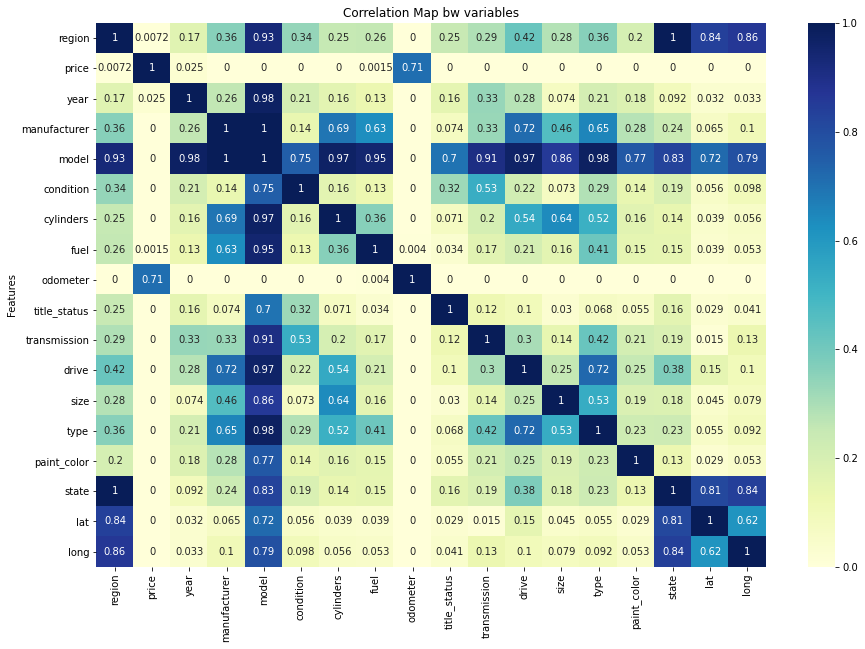

In [ ]:
plt.figure(figsize=(15,10))#defining figsize
ax=sns.heatmap(Corr_matrix,annot=True,cmap="YlGnBu")#plotting heatmap 
plt.title('Correlation Map bw variables')#title for a figure
plt.ylabel('Features')#y label for a figure
plt.show()



**Observations**:

<ol> 1.Price is highly correlated to odometer so odometer is the most imp feature</ol>
<ol>2.Model has almost very high correlation with every other feature.</ol>
<ol>3.State is highly correlated to region,lat,long.</ol>
</body>




In [ ]:
vehicles.dtypes #printing vehicle data types

region           object
price             int64
year              Int32
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
lat             float64
long            float64
dtype: object

In [ ]:
vehicles['cylinders'].value_counts()#print counts of unique values

6 cylinders     105677
4 cylinders      94767
8 cylinders      81179
5 cylinders       2058
10 cylinders      1543
other             1112
3 cylinders        550
12 cylinders       187
Name: cylinders, dtype: int64

In [ ]:
vehicles['year'].value_counts()

2017    42405
2014    34243
2013    33392
2015    32609
2016    31966
        ...  
1910        1
1915        1
1918        1
1920        1
1919        1
Name: year, Length: 110, dtype: Int64

In [ ]:
vehicles['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [ ]:
vehicles['state'].nunique()

51

In [ ]:
vehicles['model'].value_counts()


f-150                         8370
silverado 1500                5964
1500                          4211
camry                         4033
accord                        3730
                              ... 
sonata gls sedan                 1
sierra 2500hd slt 2wd            1
f250 lariat super duty 4x4       1
liberty renegate                 1
q7 3.0 tdi premium               1
Name: model, Length: 31520, dtype: int64

In [ ]:
vehicles['model'].nunique()

31520

In [ ]:
vehicles['condition'].value_counts()

good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64

In [ ]:
vehicles['fuel'].value_counts()

gas         399399
diesel       31077
other        16359
hybrid        5790
electric      2351
Name: fuel, dtype: int64

In [ ]:
vehicles['title_status'].value_counts()

clean         439626
rebuilt         8698
salvage         4233
lien            2091
missing          794
parts only       194
Name: title_status, dtype: int64

In [ ]:
vehicles['size'].value_counts()

full-size      69736
mid-size       41782
compact        21825
sub-compact     3522
Name: size, dtype: int64

In [ ]:
vehicles.price.describe() #describing price column

count    4.582130e+05
mean     4.042093e+04
std      8.194599e+06
min      0.000000e+00
25%      4.900000e+03
50%      1.099500e+04
75%      2.149500e+04
max      3.615215e+09
Name: price, dtype: float64

<h4>As we can see mean of our dependent variable i.e price is around 40k and max is 3k million which is very high value so there is a possibility of outliers in a dataset.</h4>

<h2>What is the distibution of price column ?</h2>

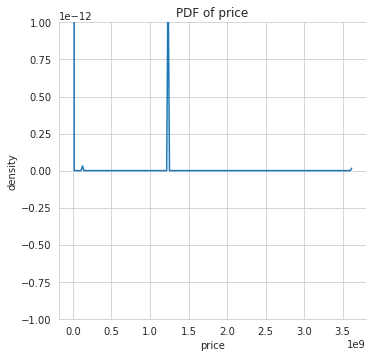

In [ ]:
sns.set_style("whitegrid")#setting style as whitegrid 
sns.FacetGrid(vehicles,height=5) \
   .map(sns.kdeplot, "price") \
   .add_legend();
plt.ylabel('density')
plt.title('PDF of price')
plt.show()

In [ ]:
print('No. of Cars having prices above 100k $:-', len(vehicles[vehicles['price']>=100000]))

No. of Cars having prices above 100k $:- 617


**Observations**:

<h4>By looking at the price distribution we can find that price has some outliers where few cars are highly overpriced.</h4>
<h4> This is a righlty skewed distibution.
<h4>This may be due to the discrepancy while entering the data.</h4>
<h4>During further analysis i found that there are four cars which are being are sold for more than 500k dollars among them two are chevrolet ,one is gmc, and other one is jeep</h4>
<h4>There are total 617 cars priced above 100k $.</h4>

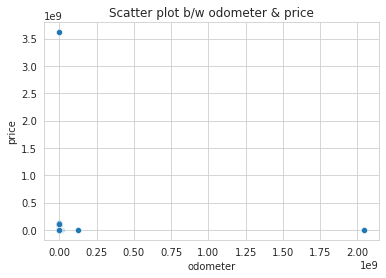

In [ ]:
sns.scatterplot(vehicles['odometer'],vehicles['price'])#plotting scatter plot b/w price and odometer
plt.title("Scatter plot b/w odometer & price")
plt.show()


<h4>We can not make any solid observation just by looking at the  scatterplot b/w odometer and price.</h4>

In [ ]:
#this function will plot the countplot for a particular feature
def plot_countplot(feature,size):
    plt.figure(figsize=size)#defining figsize
    ax=sns.countplot(x=feature,data=vehicles)#plotting countplot for a given feature
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)#rotating and setting the font size of x labels
    plt.title("No. of cars by {}".format(feature))#title for a figure
    plt.ylabel('No. of cars')#y label for a figure
    plt.show()

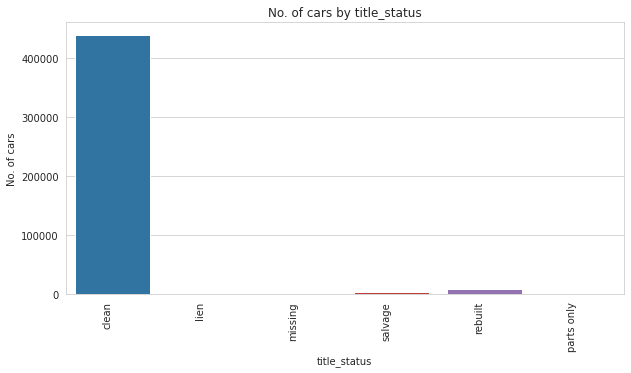

In [ ]:
plot_countplot('title_status',(10,5))#first parameter is feature and second parameter is figsize


<h4>By this plot we can observe alomost all the cars listed in the market are clean and there were very few cars which had title_status as rebuilt or salvage.</h4>

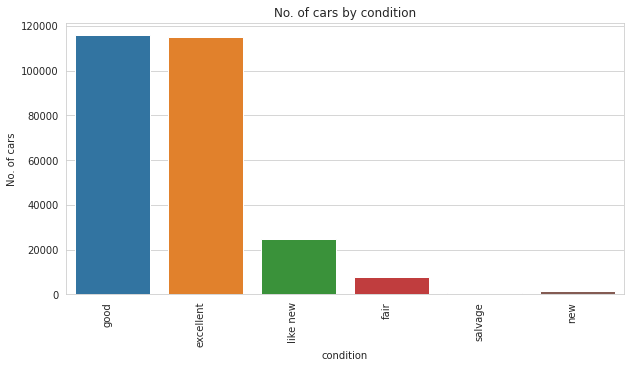

In [ ]:
plot_countplot('condition',(10,5))

<h4>Most of the cars available in the market are in good or excellent condition.</h4>
<h4>There are very few cars which have condition as new or salvage (Car has suffered some kind of significant damage in the past).</h4>


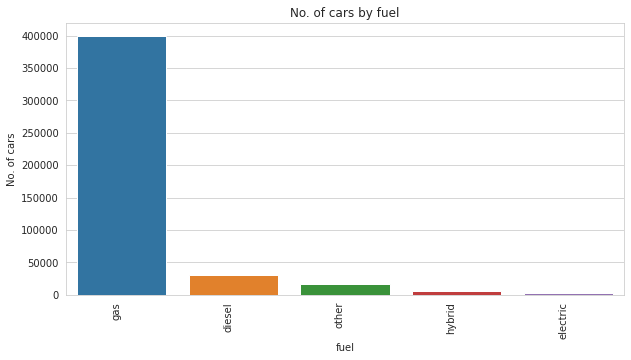

In [ ]:
plot_countplot('fuel',(10,5))

<h4>Around 87% of the cars have fuel type as gas. It means people in USA mostly prefer cars with fuel type as gas </h4>

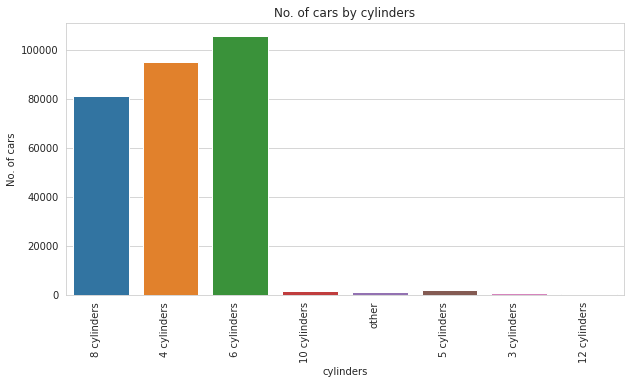

In [ ]:
plot_countplot('cylinders',(10,5))

<h4> Around 23% cars available in the market have 6 cylinders,around  20% have 4 cylinders , around 17% have 8 cylinders. It means people in USA mostly prefer fuel economy cars over high powered cars.</h4>

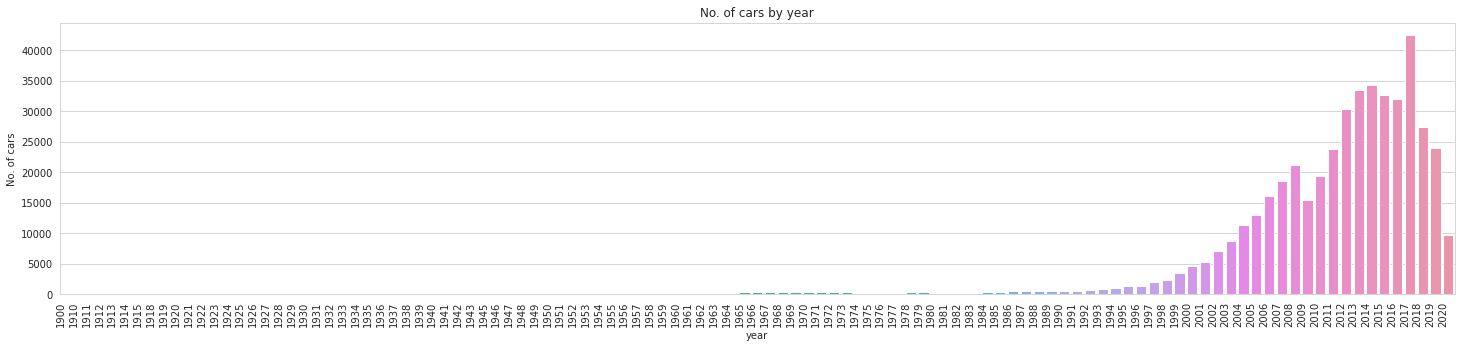

In [ ]:
plot_countplot('year',(25,5))

<h4>the graph shows that after a year 1960 a gradual increase in the availability of second hand card has been observed .</h4>
<h4>there is one interesting observation that in year 2009 availability suddenly dropped this may be due to the recession.</h4>
<h4>It was highest in year 2017 then it started decreasing in the following years.</h4>
<h4>In year 2020 because of covid the no. has decreased signifincatly</h4>

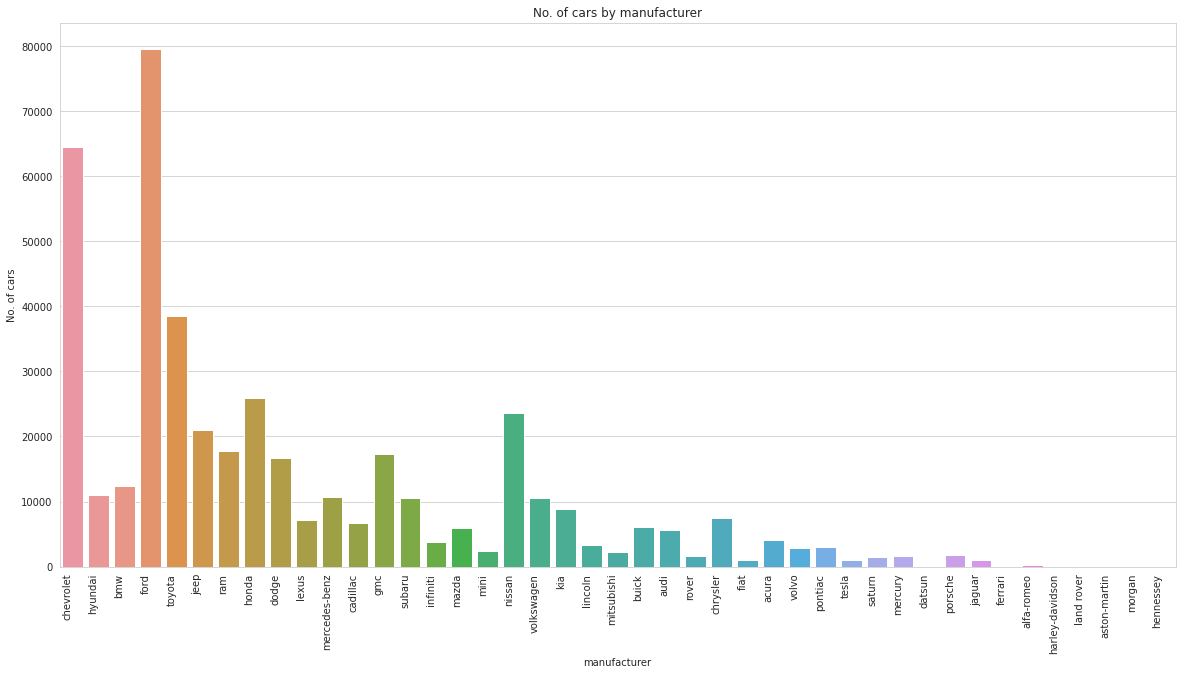

In [ ]:
plot_countplot('manufacturer',(20,10))

<h4> Big american giants ford and chevrolet are the first and second most popular brand in the usa </h4>
<h4> After these comes japenese brands toyota,nissan and honda</h4>


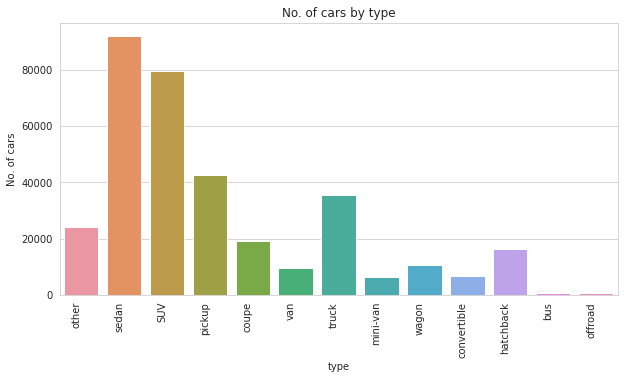

In [ ]:
plot_countplot('type',(10,5))

<h4>No. of Sedan cars is the highest among used cars which has been listed for sell in usa.Then comes SUV,pickup.</h4>
 

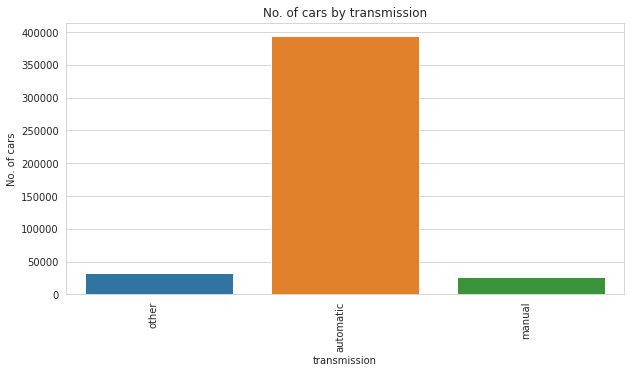

In [ ]:
plot_countplot('transmission',(10,5))

<h4>86.5% cars listed in the usa used car market have transmission as automatic and remaning 14% have transmission either manual or other.</h4>


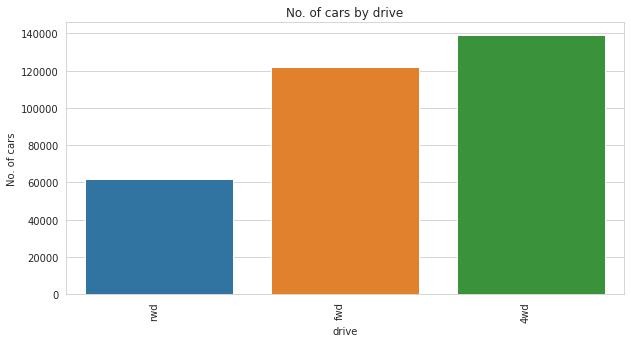

In [ ]:
plot_countplot('drive',(10,5))

<h4>30% cars available are four wheel drive(4wd),26% are front wheel drive(fwd). 
There is not much difference in the no. of cars by drive type (fwd and 4wd).
rwd cars are significantly low as compared to other two.</h4>

**Let's check the relation of these features with target variable**

In [ ]:
def plot_barplot(feature,data,size,rotate=False):
  plt.figure(figsize=size)
  ax=sns.barplot(x=feature,data=data,y='price')
  if rotate==True:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10)
  plt.title("{} vs Price".format(feature))
  plt.xlabel(feature)
  plt.ylabel('Price')
  plt.show()

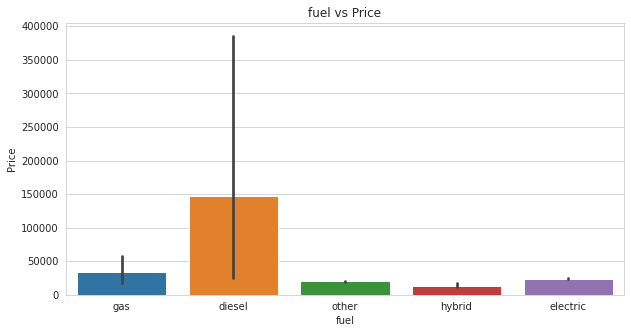

In [ ]:
plot_barplot('fuel',vehicles,(10,5))

<h4>Diesel cars are the costliest in the market whereas hybrid cars have the low prices so this can be the imp. feature.</h4>

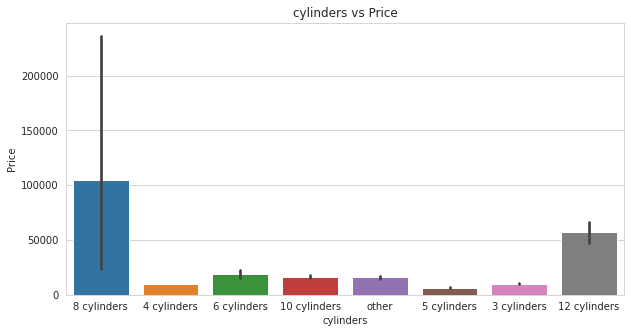

In [ ]:
plot_barplot('cylinders',vehicles,(10,5))

<h4>8 cylinder cars are the costliest whereas 4 & 5 cylinder cars are the cheapest</h4>

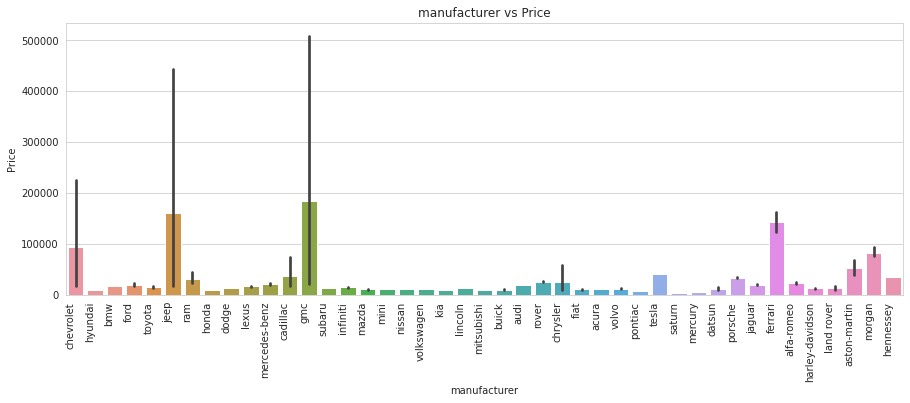

In [ ]:
plot_barplot('manufacturer',vehicles,(15,5),True)

<h4>gmc,jeep,chevrolet,ferrari are the costliest cars respectively.
Tesla,audi,rover,jaguar cars are in the mid range segment.
mistubishi,kia,hyundai are in the cheapest price segment.</h4>

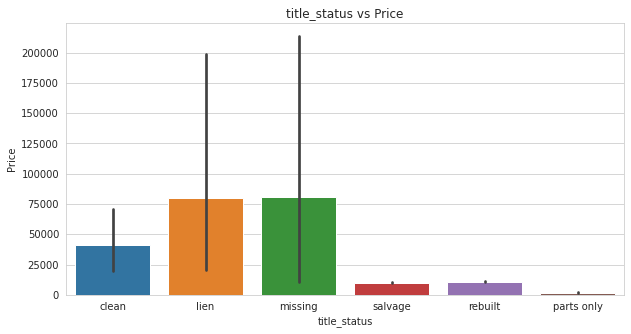

In [ ]:
plot_barplot('title_status',vehicles,(10,5))

<h4>One interesting observation from this graph is that cars having lien as title_status are highly priced .
There might be some outstanding balance remaining on the car.</h4>

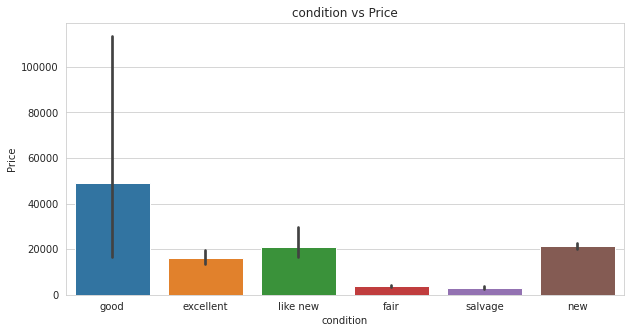

In [ ]:
plot_barplot('condition',vehicles,(10,5))

<h4>It is very clear from the above figure new condition car has the highest price as expected.</h4>

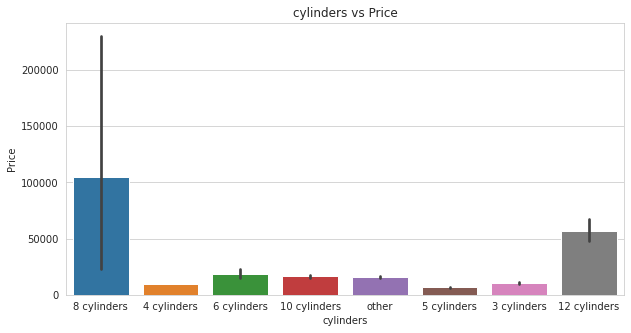

In [ ]:
plot_barplot('cylinders',vehicles,(10,5))

<h4>It can be clearly seen the 12 cylinders car has the highest price as expected because if
the no. of cylinders increase so does the power of engine and it's cost.</h4>

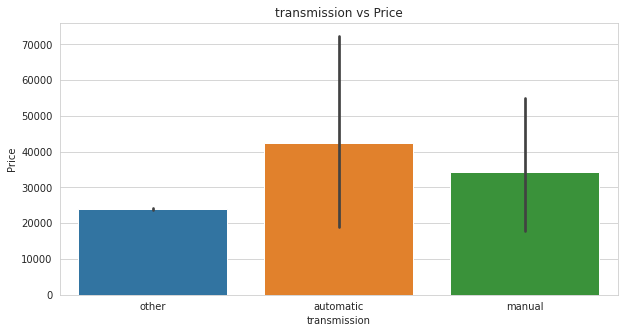

In [ ]:
plot_barplot('transmission',vehicles,(10,5))

<h4>Average price of automatic cars are slighlty higher than manual.Other transmission type has the highest average price.</h4>

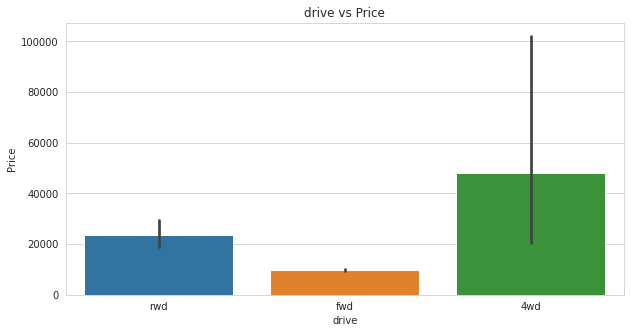

In [ ]:
plot_barplot('drive',vehicles,(10,5))

<h4>By looking at the above plot we can tell that 4wd cars have slighlty higher prices as compared to rwd 
while fwd is significantlly cheaper in comparison to other two types.</h4>

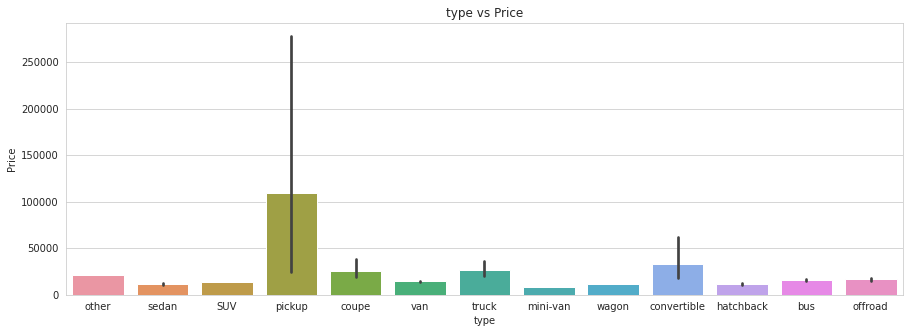

In [ ]:
plot_barplot('type',vehicles,(15,5))

<h4>Pickup,Truck are the costliest vehicles while sedan,hathback,mini-van are the cheapest.</h4>

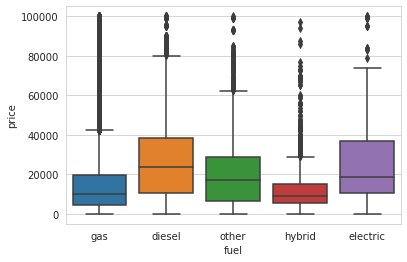

In [ ]:
sns.boxplot(x="fuel", y="price",data=vehicles[vehicles['price']<100000])

<h4>75% of cars having fuel type as gas has price under 20k USD.</h4>
<h4>75 % of diesel and electric cars are priced under 40k USD.</h4>
<h4>We can draw a conclusion that diesel and electric cars cost more than gas and hybrid cars.</h4>

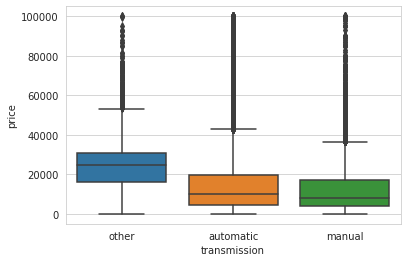

In [ ]:
sns.boxplot(x='transmission',y='price',data=vehicles[vehicles['price']<100000])

<h4>75 % of automatic and manual transmission cars have price under 20k USD while other transmission cars are costlier.</h4>

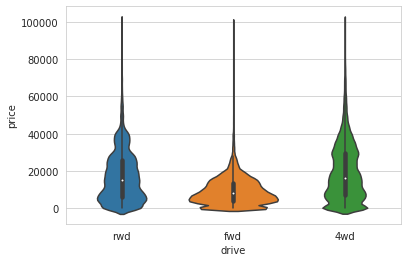

In [ ]:
sns.violinplot(x='drive',y='price',data=vehicles[vehicles['price']<100000])

<h4>The distribution of rwd and 4wd is somewhat similar but fwd has a different distribution.</h4>
<h4>more than 75% fwd cars are priced under 20k$</h4>


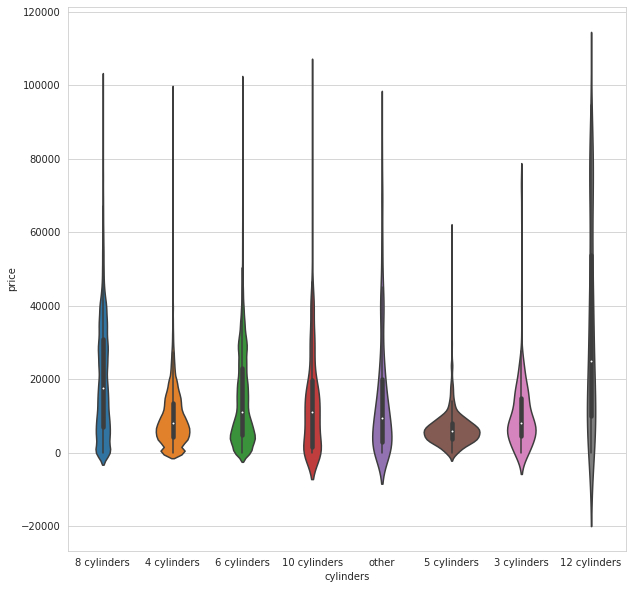

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='cylinders',y='price',data=vehicles[vehicles['price']<100000])

<h2> Data Cleaning and Handling Outliers </h2>

Removing Size feature as it contains 70% null values.

In [ ]:
vehicles=vehicles.drop('size',axis=1)

Dropping Model feature as it is highly correlated with other features and dropping region,lat,long as they have high correlation with State.

In [ ]:
vehicles=vehicles.drop(['model','region','lat','long'],axis=1)

In [ ]:
vehicles.drop_duplicates(inplace=True)

In [ ]:
print('No. of duplicates records dropped are {}'.format(df.shape[0]-vehicles.shape[0]))

No. of duplicates records dropped are 53890


In [ ]:
sample=vehicles.dropna()

In [ ]:
sample=sample.sample(50)

Above we saw some car prices were in millions so let's remove those outliers.


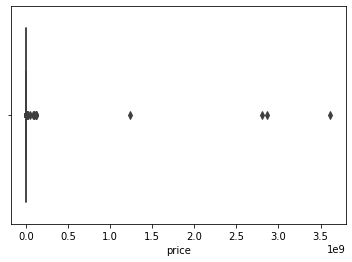

In [ ]:
sns.boxplot(vehicles['price'])

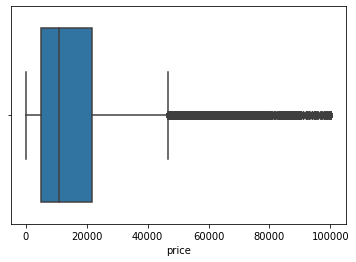

In [ ]:
sns.boxplot(vehicles[vehicles.price<100000]['price'])

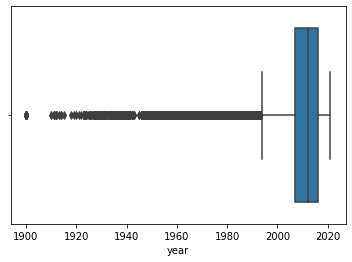

In [ ]:
sns.boxplot(vehicles['year'])

In [ ]:
'''This function will do all the data cleaning and removal of outliers'''
def clean_data(data):
  data=data[data['year']<2021]#data was scraped from craiglist in year 2020 and manufacturing year cant be 2021
  data=data[data.price<=100000]#removing car priced above 0.1 million dollars 
  data=data[data.year>1950]#removing cars aged above 70
  data=data[data.odometer!=0]#removing records where odometer value is 0
  '''Dropping cars with price less than 1000 and miles less than 60,000 and model age greater than 10'''
  data.drop(data[(data.price < 1000 ) & (data.odometer < 60000 ) & (data.year <2010)].index, inplace = True)
  data.drop(data[(data.price < 200)].index, inplace = True)#dropping cars priced under 200$
  data.drop(data[data.odometer>=500000].index, inplace = True)#removing cars where it has driven more than 0.5 million miles 
  return data



In [ ]:
cars=vehicles.copy()

In [ ]:
cleaned_vehicles=clean_data(vehicles)

**Box-Cox transformation of target variable and numerical features**

mu = 15958.074756078548 and sigma = 12857.537119318742


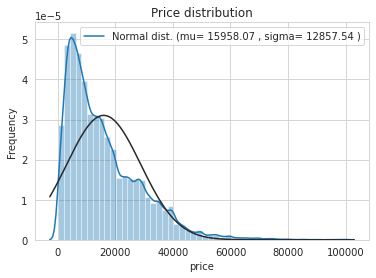

In [ ]:
(mu, sigma) = norm.fit(cleaned_vehicles['price'])

# 1. Plot Price
sns.distplot(cleaned_vehicles['price'], fit=norm);
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} , sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu = {} and sigma = {}'.format(mu, sigma))

Price distribution is rightly skewed so we will apply boxcox transformation

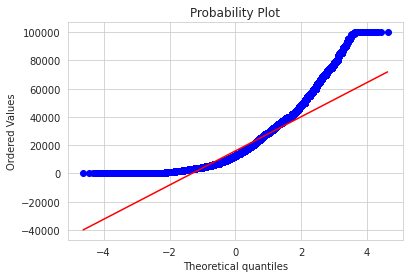

In [ ]:
fig = plt.figure()
res = stats.probplot(cleaned_vehicles['price'], plot=plt)
plt.show()

In [ ]:
#applying box-cox transformation to remove skewness and converting it to normal distribution
price_box,lam_price= boxcox(cleaned_vehicles['price'])
cleaned_vehicles['price'] =price_box

**Let's check the distribution after applying boxcox transformation**

mu_boxcox = 53.15 and sigma_boxcox = 15.08


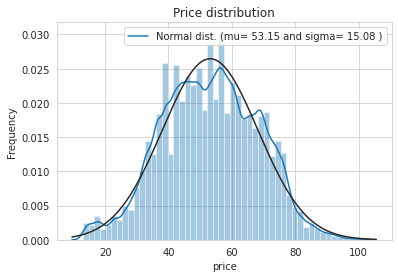

In [ ]:
(mu, sigma) = norm.fit(cleaned_vehicles['price'])

# 1. Plot Price
sns.distplot(cleaned_vehicles['price'], fit=norm);
plt.ylabel('Frequency')
plt.title('Price distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( 'mu_boxcox = {:.2f} and sigma_boxcox = {:.2f}'.format(mu, sigma))

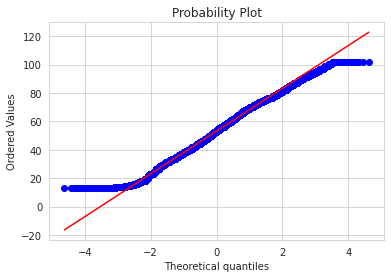

In [ ]:
fig = plt.figure()
res = stats.probplot(cleaned_vehicles['price'], plot=plt)
plt.show()

***Missing-value Imputation using IterativeImputer for numerical type columns***

In [ ]:
def imputation_numeric(numeric):
  '''this function will compute missing values for numerical type feature'''
  imp_numeric = IterativeImputer(GradientBoostingRegressor())
  imputed = imp_numeric.fit_transform(numeric)
  numeric_imp = pd.DataFrame(imputed, columns = numeric.columns, index= numeric.index)
  return numeric_imp



In [ ]:
numeric_columns=['odometer','year']
vehicles_year_odo=imputation_numeric(cleaned_vehicles[numeric_columns])
cleaned_vehicles['odometer']=vehicles_year_odo['odometer']
cleaned_vehicles['year']=vehicles_year_odo['year']

In [ ]:
import pickle
with open('vehicles.pickle', 'wb') as handle:
    pickle.dump(cleaned_vehicles, handle)

In [ ]:
import pickle
inifile=open('vehicles.pickle','rb')
cleaned_vehicles=pickle.load(inifile)

#Feature Engineering


<h2>Missing Values imputation for categorical feature</h2> 

**Let's check the missing value % for every feature**

In [ ]:
#printing percentage of null values for each feature.
column_null=cleaned_vehicles.isnull().sum()#finding the sum of total null values in the dataset
for i in range(len(cleaned_vehicles.columns)):
    print('{} feature has {} % of null values'.format(cleaned_vehicles.columns[i],(column_null[i]/cleaned_vehicles.shape[0])*100))
    print('*'*10)

price feature has 0.0 % of null values
**********
year feature has 0.0 % of null values
**********
manufacturer feature has 3.3833074846343845 % of null values
**********
condition feature has 38.00606692214482 % of null values
**********
cylinders feature has 35.39302331306467 % of null values
**********
fuel feature has 0.45871183213936956 % of null values
**********
odometer feature has 0.0 % of null values
**********
title_status feature has 0.297328420712877 % of null values
**********
transmission feature has 0.4455823342606041 % of null values
**********
drive feature has 28.139522797458348 % of null values
**********
type feature has 22.863926431046885 % of null values
**********
paint_color feature has 28.523287079206433 % of null values
**********
description feature has 0.011488310643919811 % of null values
**********
state feature has 0.0 % of null values
**********


First let's fill condition feature as by domain knowledge we know condition of car depends on it's ,how old it is so both this information can be fed from year and odometer values.

we can fill cars with year 2020 as 'new' and for year 2018-2019 like new and for years less than 2018 we can fill with respect to odometer values as odometer can give the idea how much car has driven

In [ ]:
cleaned_vehicles.loc[(cleaned_vehicles.year>=2018) & (cleaned_vehicles.year<=2019),'condition']=cleaned_vehicles.loc[(cleaned_vehicles.year>=2018) & (cleaned_vehicles.year<=2019),'condition'].fillna('like new')

In [ ]:
cleaned_vehicles.loc[cleaned_vehicles.year>2019,'condition']=cleaned_vehicles.loc[cleaned_vehicles.year>2019,'condition'].fillna('new')

In [ ]:
excellent_odo_median = cleaned_vehicles[cleaned_vehicles['condition'] == 'excellent']['odometer'].median()
good_odo_median = cleaned_vehicles[cleaned_vehicles['condition'] == 'good']['odometer'].median()
like_new_odo_median = cleaned_vehicles[cleaned_vehicles['condition'] == 'like new']['odometer'].median()
salvage_odo_median = cleaned_vehicles[cleaned_vehicles['condition'] == 'salvage']['odometer'].median()
fair_odo_median = cleaned_vehicles[cleaned_vehicles['condition'] == 'fair']['odometer'].median()

In [ ]:
print('Excellent average odometer:',excellent_odo_median)
print('Good average odometer:',good_odo_median)
print('Like new average odometer:',like_new_odo_median)
print('Salvage average odometer:',salvage_odo_median)
print('Fair average odometer:',fair_odo_median)



Excellent average odometer: 100868.0033326615
Good average odometer: 76012.0
Like new average odometer: 38935.0
Salvage average odometer: 145027.09087748494
Fair average odometer: 157800.0


<p><li><ol>1)From this we can assume if odometer values is less than 38935 it would be like_new</ol>
<ol>2)if it would be greater than 157800 than it should be considered as fair as it is the highest.</ol>
<ol>3)good can be filled where it is greater than like_new and less than excellent</ol>
<ol>4)Excellent can be filled where it is greater than good and less than salvage.</ol>
<ol>5)Salvage can be filled where it is greater than excellent and less than fair.</ol></p>

In [ ]:
cleaned_vehicles.loc[cleaned_vehicles['odometer']<like_new_odo_median,'condition']=cleaned_vehicles.loc[cleaned_vehicles['odometer']<like_new_odo_median,'condition'].fillna('like new')
cleaned_vehicles.loc[cleaned_vehicles['odometer']>=fair_odo_median,'condition']=cleaned_vehicles.loc[cleaned_vehicles['odometer']>=fair_odo_median,'condition'].fillna('fair')
cleaned_vehicles.loc[(cleaned_vehicles['odometer']>like_new_odo_median) & (cleaned_vehicles['odometer']<excellent_odo_median),'condition']=cleaned_vehicles.loc[(cleaned_vehicles['odometer']>like_new_odo_median) & (cleaned_vehicles['odometer']<excellent_odo_median),'condition'].fillna('good')
cleaned_vehicles.loc[(cleaned_vehicles['odometer']>good_odo_median) & (cleaned_vehicles['odometer']<salvage_odo_median),'condition']=cleaned_vehicles.loc[(cleaned_vehicles['odometer']>good_odo_median) & (cleaned_vehicles['odometer']<salvage_odo_median),'condition'].fillna('excellent')
cleaned_vehicles.loc[(cleaned_vehicles['odometer']>excellent_odo_median) & (cleaned_vehicles['odometer']<fair_odo_median),'condition']=cleaned_vehicles.loc[(cleaned_vehicles['odometer']>excellent_odo_median) & (cleaned_vehicles['odometer']<fair_odo_median),'condition'].fillna('salvage')

Cylinder feature null values can be filled using its manufacture .
from phik_matrix we see it has a correlation of with manufacturer as 0.69.

In [ ]:
# Changing cylinders of electric cars to 0 
cleaned_vehicles.loc[cleaned_vehicles.fuel == 'electric', 'cylinders'] = '0 cylinders'

We will check if description contains information about no. of cylinders.

In [ ]:
cleaned_vehicles['description']=cleaned_vehicles['description'].apply(lambda x:str(x).lower())
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('3 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('3 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('3 CYLINDERS')) ,"cylinders"]='3 cylinders'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('4 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('4 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('4 CYLINDERS')) ,"cylinders"]='4 cylinders'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('5 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('5 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('5 CYLINDERS')) ,"cylinders"]='5 cylinders'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('6 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('6 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('6 CYLINDERS')) ,"cylinders"]='6 cylinders'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('8 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('8 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('8 CYLINDERS')) ,"cylinders"]='8 cylinders'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('10 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('10 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('10 CYLINDERS')) ,"cylinders"]='10 cylinders'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('12 cylinders')) | 
             (cleaned_vehicles['description'].str.contains('12 Cylinders')) |
             (cleaned_vehicles['description'].str.contains('12 CYLINDERS')) ,"cylinders"]='12 cylinders'



In [ ]:
cleaned_vehicles.loc[cleaned_vehicles.cylinders=='other','cylinders']='0 cylinders'

In [ ]:
cleaned_vehicles['manufacturer']=cleaned_vehicles['manufacturer'].fillna('ford')#'ford is the mode 
cleaned_vehicles['cylinders']=cleaned_vehicles.groupby('manufacturer')['cylinders'].transform(lambda x: x.fillna(x.mode()[0]) if x.mode().empty==False else x.fillna('6 cylinders'))

Type Feature missing value imputation:

It is also highly correlated with manufacturer

In [ ]:
cleaned_vehicles['drive']=cleaned_vehicles.groupby('manufacturer')['drive'].transform(lambda x: x.fillna(x.mode()[0]) if x.mode().empty==False else x.fillna('4wd'))

In [ ]:
cleaned_vehicles['type']=cleaned_vehicles.groupby('drive')['type'].transform(lambda x: x.fillna(x.mode()[0]) if x.mode().empty==False else x.fillna('sedan'))

Filling other features with mode 

In [ ]:
cleaned_vehicles.loc[cleaned_vehicles.fuel == 'electric', 'transmission'] = 'automatic'
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('automatic transmission')) & (cleaned_vehicles['transmission'].isna()), "transmission"] = "automatic"
cleaned_vehicles.loc[(cleaned_vehicles['description'].str.contains('manual transmission')) & (cleaned_vehicles['transmission'].isna()), "transmission"] = "manual"

In [ ]:
cleaned_vehicles['transmission'] = cleaned_vehicles['transmission'].fillna('automatic')
cleaned_vehicles['title_status'] = cleaned_vehicles['title_status'].fillna('clean')
cleaned_vehicles['fuel'] = cleaned_vehicles['fuel'].fillna('gas')
cleaned_vehicles['paint_color'] = cleaned_vehicles['paint_color'].fillna('white')


In [ ]:
cleaned_vehicles.isna().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
dtype: int64

Now, there are no null values in dataset

We can compute age of car from its manufacturing year 

In [ ]:
#adding age feature 
cleaned_vehicles['age']= date.today().year-cleaned_vehicles['year']

**Box-cox transforamtion for continous feature**

In [ ]:
odo_box,lam_odo = boxcox(cleaned_vehicles['odometer'])
cleaned_vehicles['odometer'] = odo_box

 mu_box = 956.65 and sigma_box = 385.92


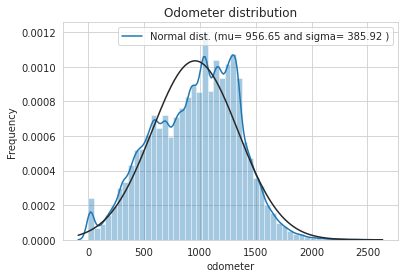

In [ ]:
(mu, sigma) = norm.fit(cleaned_vehicles['odometer'])

# 1. Plot Odometer
sns.distplot(cleaned_vehicles['odometer'],fit=norm);
plt.ylabel('Frequency')
plt.title('Odometer distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

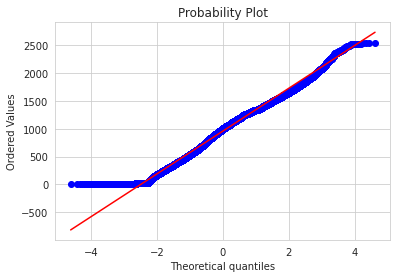

In [ ]:
fig = plt.figure()
res = stats.probplot(cleaned_vehicles['odometer'], plot=plt)
plt.show()

 mu_box = 10.39 and sigma_box = 8.33


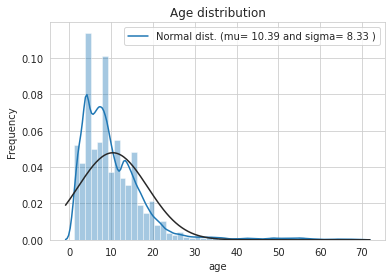

In [ ]:
(mu, sigma) = norm.fit(cleaned_vehicles['age'])

# 1. Plot Odometer
sns.distplot(cleaned_vehicles['age'],fit=norm);
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

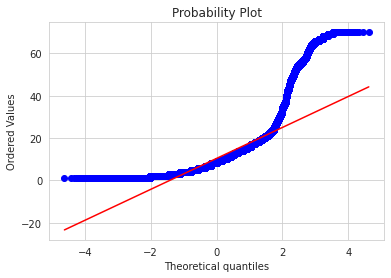

In [ ]:
fig = plt.figure()
res = stats.probplot(cleaned_vehicles['age'], plot=plt)
plt.show()

Let's check the distribution if we transform age using boxcox transformation

 mu_box = 2.44 and sigma_box = 0.98


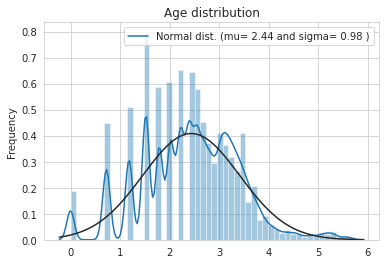

In [ ]:
(mu, sigma) = norm.fit(boxcox(cleaned_vehicles['age'])[0])

# 1. Plot Odometer
sns.distplot(boxcox(cleaned_vehicles['age'])[0],fit=norm);
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.legend(['Normal dist. (mu= {:.2f} and sigma= {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( ' mu_box = {:.2f} and sigma_box = {:.2f}'.format(mu, sigma))

So even by applying box-cox transformation on age feature distribution doesnt look like normal distribution. We won't transform this feature.

**Data Preprocessing and Feature Engineering**

**Average odometer rating per year**

In [ ]:
cleaned_vehicles['avg_odo_year']=cleaned_vehicles['odometer']/cleaned_vehicles['age']

**Sin of odometer feature**

In [ ]:
cleaned_vehicles['sin_odo']=cleaned_vehicles['odometer'].apply(lambda x: np.sin(x))

**Sin of age feature**

In [ ]:
cleaned_vehicles['sin_age']=cleaned_vehicles['age'].apply(lambda x: np.sin(x))

There is a perfect negative correlation between age and year so it's better to drop one feature so we will drop Year feature.

In [ ]:
X=cleaned_vehicles.drop(['price','year'],axis=1)

In [ ]:
y=cleaned_vehicles['price']#target variable

**Preprocessing Description Feature**

In [ ]:

nltk.download('stopwords')
STOP_WORDS = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x=re.sub('[^A-Za-z0-9]+', ' ',x)
    x=re.sub(r'[0-9]+', '',x)
    x=re.sub(' +', ' ', x)
    
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    return x
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X['description']=X['description'].apply(preprocess)#applying preprocessing on description feature
X['description']=X['description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in STOP_WORDS))#removing stop words

In [ ]:
def preprocess_cylinders(i):
  if i=='0 cylinders':
    i='zero_cylinder'
  elif i=='3 cylinders':
    i='three_cylinders'
  elif i=='4 cylinders':
    i='four_cylinders'
  elif i=='5 cylinders':
    i='five_cylinders'
  elif i=='6 cylinders':
    i='six_cylinders'
  elif i=='8 cylinders':
    i='eight_cylinders'
  elif i=='10 cylinders':
    i='ten_cylinders'
  elif i=='12 cylinders':
    i='twelve_cylinders'
  return i
X['cylinders']=X['cylinders'].apply(lambda x: preprocess_cylinders(x))

**Train-Test(80-20) Split**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state=21)

**Column Standardization** 

In [ ]:
scaler=StandardScaler()
for i in ['odometer','age']:
    X_train[i]=scaler.fit_transform(X_train[i].values.reshape(-1,1))
    X_test[i]=scaler.fit_transform(X_test[i].values.reshape(-1,1))

**Encoding description feature using TFIDF and others as One hot Encoding** 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

We will be taking top most 200 words from our description feature 

In [ ]:
vectorizer_desc = TfidfVectorizer(min_df=5,ngram_range=(1,3), max_features=200)#max_features=200 mean dictionary will consist max 200 words 

In [ ]:
vectorizers=[]

In [ ]:

x_train_description=vectorizer_desc.fit_transform(X_train['description'].values)#fitting X-train['description'] to create dictionary of unique words



In [ ]:
x_test_description = vectorizer_desc.transform(X_test['description'].values)

In [ ]:
vectorizers.append(vectorizer_desc)

**One hot Encoding**

In [ ]:
Columns_feat=[]#Features list to store feature name
Columns_feat.append(vectorizer_desc.get_feature_names())

In [ ]:
vectorizer_state=CountVectorizer(binary=True)
x_train_state_ohe=vectorizer_state.fit_transform(X_train['state'].values)
x_test_state_ohe=vectorizer_state.transform(X_test['state'].values)
Columns_feat.append(vectorizer_state.get_feature_names())
vectorizers.append(vectorizer_state)


In [ ]:
vectorizer_condition=CountVectorizer(binary=True)
x_train_condition_ohe=vectorizer_condition.fit_transform(X_train['condition'].astype('str').values)
x_test_condition_ohe=vectorizer_condition.transform(X_test['condition'].astype('str').values)
Columns_feat.append(vectorizer_condition.get_feature_names())
vectorizers.append(vectorizer_condition)

In [ ]:
vectorizer_fuel=CountVectorizer(binary=True)
x_train_fuel_ohe=vectorizer_fuel.fit_transform(X_train['fuel'].astype('str').values)
x_test_fuel_ohe=vectorizer_fuel.transform(X_test['fuel'].astype('str').values)
Columns_feat.append(vectorizer_fuel.get_feature_names())
vectorizers.append(vectorizer_fuel)



In [ ]:
vectorizer_cyl=CountVectorizer(binary=True)
x_train_cyl_ohe=vectorizer_cyl.fit_transform(X_train['cylinders'].astype('str').values)
x_test_cyl_ohe=vectorizer_cyl.transform(X_test['cylinders'].astype('str').values)
Columns_feat.append(vectorizer_cyl.get_feature_names())
vectorizers.append(vectorizer_cyl)


In [ ]:
vectorizer_title=CountVectorizer(binary=True)
x_train_title_ohe=vectorizer_title.fit_transform(X_train['title_status'].astype('str').values)
x_test_title_ohe=vectorizer_title.transform(X_test['title_status'].astype('str').values)
Columns_feat.append(vectorizer_title.get_feature_names())
vectorizers.append(vectorizer_title)



In [ ]:
vectorizer_transmission=CountVectorizer(binary=True)
x_train_transmission_ohe=vectorizer_transmission.fit_transform(X_train['transmission'].astype('str').values)
x_test_transmission_ohe=vectorizer_transmission.transform(X_test['transmission'].astype('str').values)
Columns_feat.append(vectorizer_transmission.get_feature_names())
vectorizers.append(vectorizer_transmission)



In [ ]:

vectorizer_type=CountVectorizer(binary=True)
x_train_type_ohe=vectorizer_type.fit_transform(X_train['type'].astype('str').values)
x_test_type_ohe=vectorizer_type.transform(X_test['type'].astype('str').values)
Columns_feat.append(vectorizer_type.get_feature_names())
vectorizers.append(vectorizer_type)



In [ ]:
vectorizer_drive=CountVectorizer(binary=True)
x_train_drive_ohe=vectorizer_drive.fit_transform(X_train['drive'].astype('str').values)
x_test_drive_ohe=vectorizer_drive.transform(X_test['drive'].astype('str').values)
Columns_feat.append(vectorizer_drive.get_feature_names())
vectorizers.append(vectorizer_drive)


In [ ]:
vectorizer_mf=CountVectorizer(binary=True)
x_train_mf_ohe=vectorizer_mf.fit_transform(X_train['manufacturer'].astype('str').values)
x_test_mf_ohe=vectorizer_mf.transform(X_test['manufacturer'].astype('str').values)
Columns_feat.append(vectorizer_mf.get_feature_names())
vectorizers.append(vectorizer_mf)



In [ ]:
x_odometer=X_train['odometer'].values.reshape(-1,1)
x_odometer_test=X_test['odometer'].values.reshape(-1,1)
x_age=X_train['age'].values.reshape(-1,1)
x_age_test=X_test['age'].values.reshape(-1,1)
x_avgodo=X_train['avg_odo_year'].values.reshape(-1,1)
x_avgodo_test=X_test['avg_odo_year'].values.reshape(-1,1)
x_sinodo=X_train['sin_odo'].values.reshape(-1,1)
x_sinodo_test=X_test['sin_odo'].values.reshape(-1,1)
x_sinage=X_train['sin_age'].values.reshape(-1,1)
x_sinage_test=X_test['sin_age'].values.reshape(-1,1)


In [ ]:
from scipy.sparse import hstack
#conactinating all the features
X_train_total=hstack((x_train_description,x_train_state_ohe,x_train_condition_ohe,x_train_fuel_ohe,x_train_cyl_ohe,x_train_title_ohe,x_train_transmission_ohe,x_train_type_ohe,x_train_drive_ohe,x_train_mf_ohe,x_odometer,x_age,x_avgodo,x_sinodo,x_sinage)).tocsr()

In [ ]:
X_test_total=hstack((x_test_description,x_test_state_ohe,x_test_condition_ohe,x_test_fuel_ohe,x_test_cyl_ohe,x_test_title_ohe,x_test_transmission_ohe,x_test_type_ohe,x_test_drive_ohe,x_test_mf_ohe,x_odometer_test,x_age_test,x_avgodo_test,x_sinodo_test,x_sinage_test)).tocsr()

In [ ]:
Features=[]
for i in Columns_feat[0:]:
  for j in i:
    Features.append(j)
Features.append('odometer')
Features.append('age')
Features.append('avg_odo_year')
Features.append('sin_odo')
Features.append('sin_age')


In [ ]:
print('Final Training data shape',X_train_total.shape)
print('Final Test data shape',X_test_total.shape)

Final Training data shape (292471, 348)
Final Test data shape (73118, 348)


<h1><b> ML Models:</b></h1>

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


**Linear-Regression**

In [ ]:
#the model will predict some values negative so this function will convert it to positive.
def convert_pos(y_test_pred):
  pos=[]
  for i in y_test_pred:
    if i<0:
      pos.append(-i)
    else:
      pos.append(i)
  return pos


In [ ]:
#This function will predict the scores for all performance metrics
def performance_metric(X_test,y_test,model):
  y_test_pred=model.predict(X_test)  
  y_test_pred=np.array(inv_boxcox(convert_pos(y_test_pred),lam_price))
  y_test=np.array(inv_boxcox(convert_pos(y_test),0.3059))
  print('mean absolute error is: ',mean_absolute_error(y_test,y_test_pred))
  print('mape is :',np.mean(np.abs((y_test - y_test_pred) / y_test))*100)
  print('mean squared error is: ',mean_squared_error(y_test,y_test_pred))
  print('R2_score is: ',r2_score(y_test,y_test_pred))
  n=X_test.shape[0]
  p=X_test.shape[1]
  print('Adjusted R2 score is: ',1-(1-r2_score(y_test,y_test_pred))*((n-1)/(n-p-1)))




In [ ]:
#This Function will plot the Feature importances for ensemble models
def plot_impfeatures(model,Features):
  features = Features
  importances = model.feature_importances_
  indices = (np.argsort(importances))[-50:]
  plt.figure(figsize=(10,12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='r', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

In [ ]:
#this function plots the actual and predicted prices comparison
def Compare_plot(X_test,y_test,model):
  y_test_pred=model.predict(X_test)  
  y_test_pred=np.array(inv_boxcox(convert_pos(y_test_pred),lam_price))
  y_test=np.array(inv_boxcox(convert_pos(y_test),lam_price))
  Comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
  Comparison.sample(20).plot(kind='bar',figsize=(10,5))
  plt.grid(which='major', linestyle='-', linewidth='0.2', color='Black')
  plt.title('Performance of {}'.format(model))
  plt.show()

**Linear-Regression**

In [ ]:
LR=LinearRegression()
LR.fit(X_train_total,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
performance_metric(X_test_total,y_test,LR)

mean absolute error is:  4637.424651210838
mape is : 84.41880068619406
mean squared error is:  54117242.30403758
R2_score is:  0.6717365733442866
Adjusted R2 score is:  0.6701667335433248


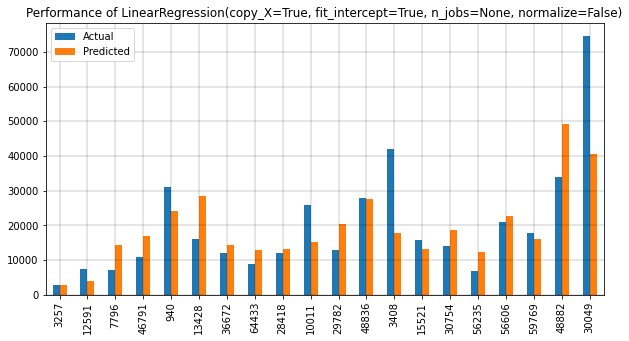

In [ ]:
Compare_plot(X_test_total,y_test,LR)

**Lasso Regression**

In [ ]:
ls=Lasso(alpha=0.001)
ls.fit(X_train_total,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
performance_metric(X_test_total,y_test,ls)

mean absolute error is:  4630.642617018511
mape is : 85.94988422742946
mean squared error is:  54412925.30741226
R2_score is:  0.6699430245276946
Adjusted R2 score is:  0.6683646075168197


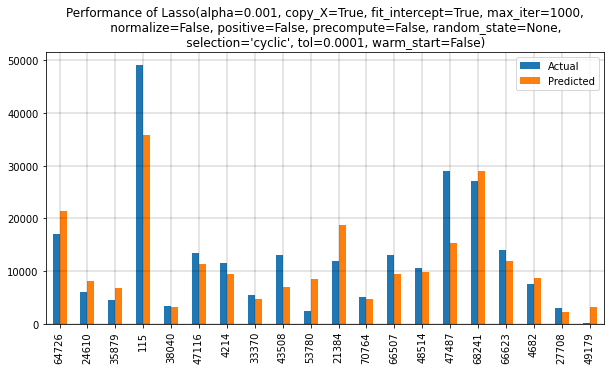

In [ ]:
Compare_plot(X_test_total,y_test,ls)

**XGB-Regressor**

<h4> Hyperparameter tuning using optuna Framewrok</h4>

---



In [ ]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler,CmaEsSampler,GridSampler
from xgboost import XGBClassifier
import joblib as joblib

In [ ]:
def objective(trial: Trial,X,y) -> float:
    
    joblib.dump(study, 'study.pkl')

    param = {
                "n_estimators" :trial.suggest_int('n_estimators', 800,900),
                'max_depth':6,
                'reg_alpha':trial.suggest_int('reg_alpha', 0, 30),
                'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
                'gamma':trial.suggest_int('gamma', 0, 5),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.005,0.5),
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
                'subsample':trial.suggest_discrete_uniform('subsample',0.1,1,0.01),
                'nthread' : -1,
                'tree_method':'gpu_hist',
        
            }
    model = XGBRegressor(**param)

    model.fit(X,y)

    return cross_val_score(model,X,y,cv=10).mean()

In [ ]:
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X_train_total,y_train),n_trials= 25)

In [ ]:
param=study.best_trial.params
print('Best trial: nparams {}'.format(param))
param['tree_method']='gpu_hist'

Best trial: nparams {'max_depth': 6, 'n_estimators': 829, 'reg_alpha': 16, 'reg_lambda': 5, 'min_child_weight': 0, 'gamma': 1, 'learning_rate': 0.1, 'colsample_bytree': 0.69, 'subsample': 0.51}


In [ ]:
xgb=XGBRegressor(**param)

In [ ]:
xgb.fit(X_train_total,y_train)

[17:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.69, gamma=1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=0, missing=None, n_estimators=829,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=16, reg_lambda=5, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.51, tree_method='gpu_hist', verbosity=1)

Performance metric scores on training data

In [ ]:
performance_metric(X_train_total,y_train,xgb)

mean absolute error is:  2173.6568536067016
mape is : 25.514404279324015
mean squared error is:  13751483.802288316
R2_score is:  0.8881848982258501
Adjusted R2 score is:  0.8880516947854471


Performance metric score on test data

In [ ]:
performance_metric(X_test_total,y_test,xgb)

mean absolute error is:  2356.289725820542
mape is : 30.50637341997438
mean squared error is:  16274098.543564253
R2_score is:  0.8669472975498882
Adjusted R2 score is:  0.8663110054412617


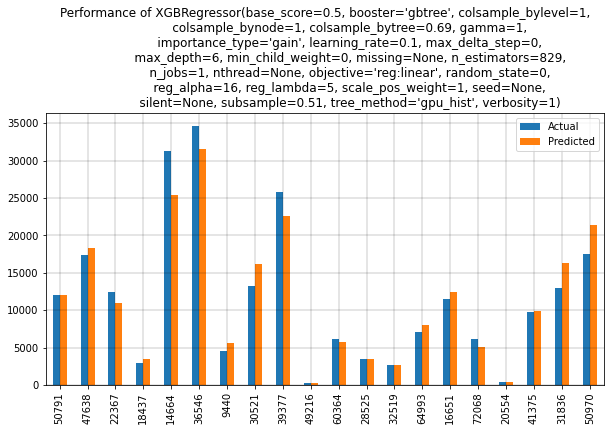

In [ ]:
Compare_plot(X_test_total,y_test,xgb)

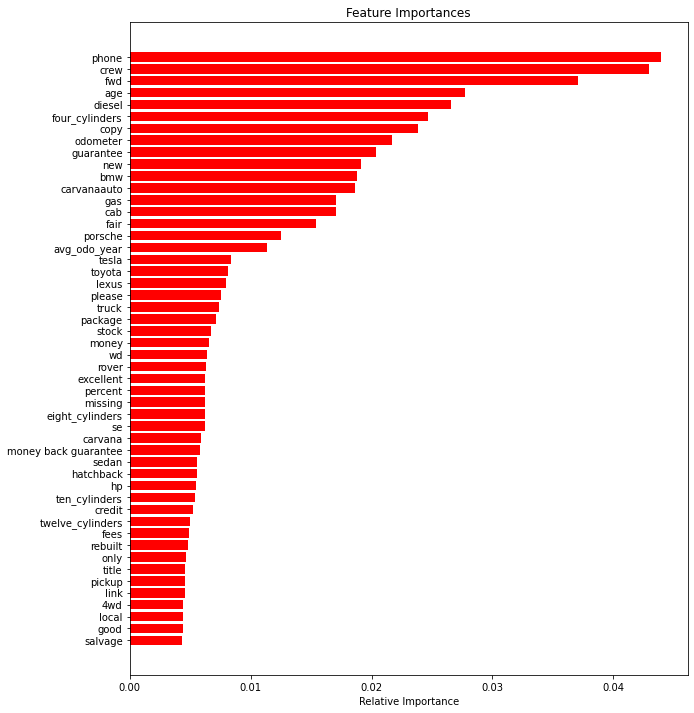

In [ ]:
plot_impfeatures(xgb,Features)

**RandomForest Regressor**

In [ ]:
rf=RandomForestRegressor(n_jobs=-1,max_depth=20,n_estimators=25)

In [ ]:
rf.fit(X_train_total,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Performance metric score on training data

In [ ]:
performance_metric(X_train_total,y_train,rf)

mean absolute error is:  1962.9627342709052
mape is : 24.112197134041892
mean squared error is:  11809298.010914706
R2_score is:  0.9039770632786578
Adjusted R2 score is:  0.9038626727775007


Performance metric score on test data

In [ ]:
performance_metric(X_test_total,y_test,rf)

mean absolute error is:  2498.714976131667
mape is : 40.2000181796011
mean squared error is:  19476745.641175374
R2_score is:  0.8407633064556669
Adjusted R2 score is:  0.8400017957937995


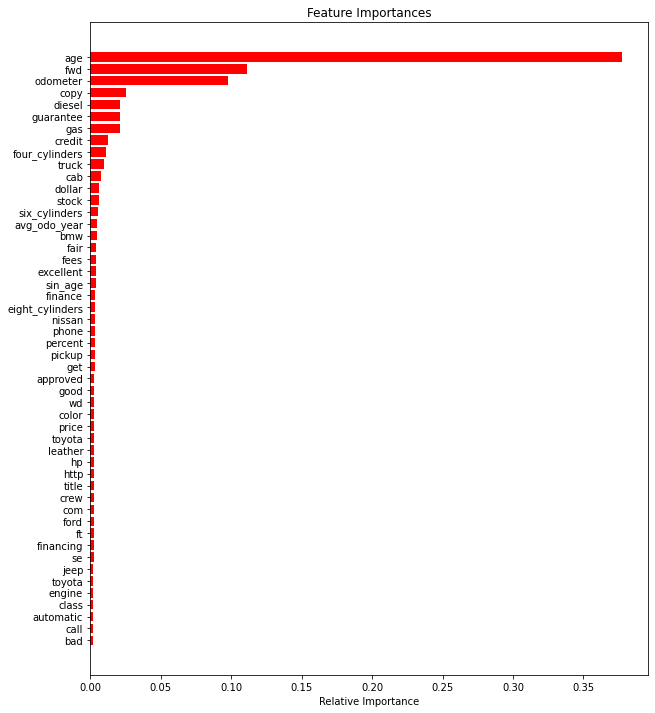

In [ ]:
plot_impfeatures(rf,Features)

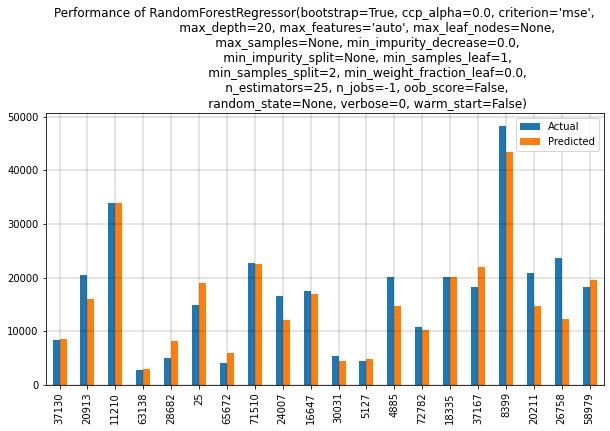

In [ ]:
Compare_plot(X_test_total,y_test,rf)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

**Ada-Boost Regressor**

In [ ]:
agr=AdaBoostRegressor(random_state=0, n_estimators=700)

In [ ]:
agr.fit(X_train_total,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=700, random_state=0)

Performance metric scores on train data

In [ ]:
performance_metric(X_train_total,y_train,agr)

mean absolute error is:  6757.361492834616
mape is : 121.72152423807385
mean squared error is:  90568005.67273934
R2_score is:  0.2635797767442395
Adjusted R2 score is:  0.26270249178215854


Performance metric scores on Test data

In [ ]:
performance_metric(X_test_total,y_test,agr)

mean absolute error is:  6762.292802072502
mape is : 121.67661502491882
mean squared error is:  90407934.37181754
R2_score is:  0.2608487678194831
Adjusted R2 score is:  0.25731395727105144


In [ ]:
def mape(X_test,y_test,model):
  y_test_pred=model.predict(X_test)  
  y_test_pred=np.array(inv_boxcox(convert_pos(y_test_pred),lam_price)) 
  y_test=np.array(inv_boxcox(convert_pos(y_test),lam_price))
  return np.mean(np.abs((y_test - y_test_pred) / y_test))*100
  

In [ ]:
models={'Linear Regression':mape(X_test_total,y_test,LR),'Lasso' :mape(X_test_total,y_test,ls),'XGBRegressor':mape(X_test_total,y_test,xgb),'RandomForest':mape(X_test_total,y_test,rf),'AdaboostRegressor':mape(X_test_total,y_test,agr)}
keys=list(models.keys())
values=list(models.values())


<Figure size 720x360 with 0 Axes>

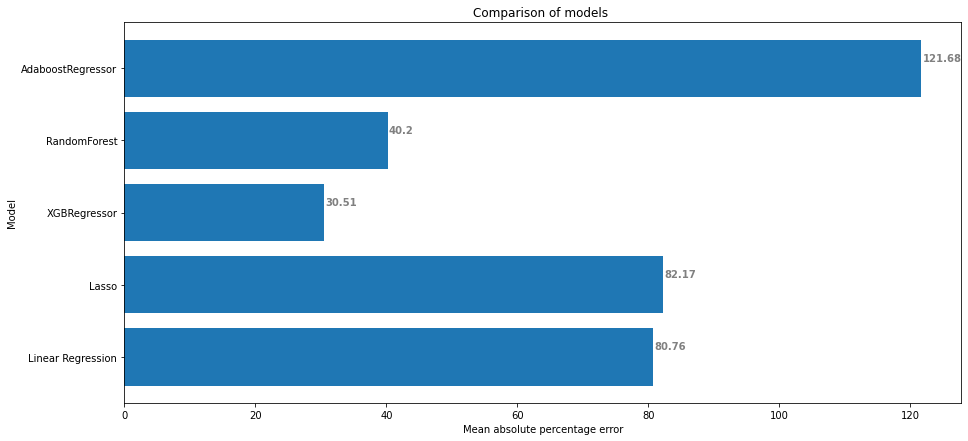

In [ ]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize =(15, 7))
ax.barh(range(len(models)), values, tick_label=keys)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.title('Comparison of models ')
plt.xlabel('Mean absolute percentage error')
plt.ylabel('Model')
plt.show()

**Conclusion**

From this plot we conculde that XGBRegressor is our best performing model and will use it predict the price of any query point.